Regression and Database Manipulation
===
---
1. Regression: Heteroskedasticity robust stardard errors
2. Database Manipulation
3. Self-practice
---

In [78]:
cd "/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata/"
insheet using "beauty.csv", clear
drop v1


/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata

(6 vars, 1,260 obs)



In [4]:
sum
// wage: hourly wage
// exper: years of workforce experience
// female: = 1 if female
// looks: rate of beauty
// educ: years of schooling


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,260     6.30669    4.660639       1.02      77.72
       exper |      1,260    18.20635    11.96349          0         48
      female |      1,260    .3460317    .4758923          0          1
       looks |      1,260    3.185714    .6848774          1          5
        educ |      1,260    12.56349    2.624489          5         17


 ---
## 1. Regression: Heteroskedasticity robust standard errors
* reg dep_var indep_var, robust

In [71]:
eststo: reg wage educ


      Source |       SS           df       MS      Number of obs   =       423
-------------+----------------------------------   F(1, 421)       =     22.85
       Model |   373.32225         1   373.32225   Prob > F        =    0.0000
    Residual |  6876.82887       421  16.3345104   R-squared       =    0.0515
-------------+----------------------------------   Adj R-squared   =    0.0492
       Total |  7250.15112       422  17.1804529   Root MSE        =    4.0416

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .4280229    .089532     4.78   0.000     .2520376    .6040083
       _cons |  -1.147117   1.165364    -0.98   0.326    -3.437774    1.143539
------------------------------------------------------------------------------
(est1 stored)


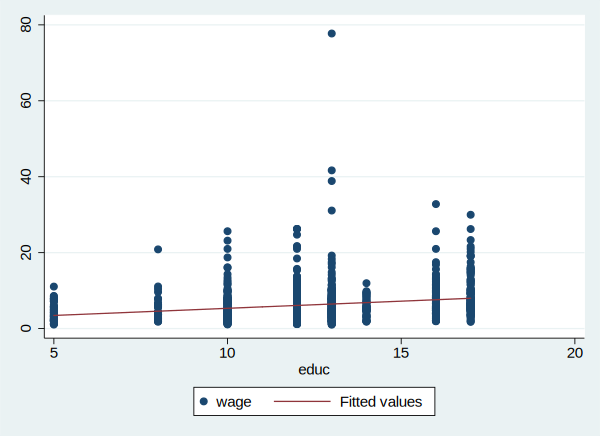

In [79]:
twoway scatter wage educ || lfit wage educ

![robust1](img/robust1.png)

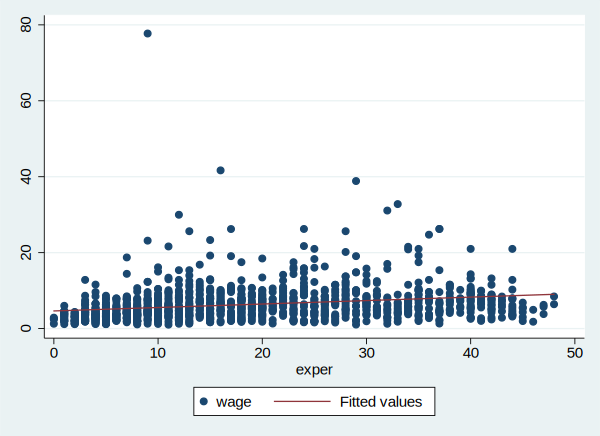

In [13]:
twoway scatter wage exper || lfit wage exper

![robust2](img/robust2.png)

In [72]:
eststo: reg wage educ, robust


Linear regression                               Number of obs     =        423
                                                F(1, 421)         =      81.87
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0515
                                                Root MSE          =     4.0416

------------------------------------------------------------------------------
             |               Robust
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .4280229   .0473056     9.05   0.000     .3350383    .5210076
       _cons |  -1.147117   .5875748    -1.95   0.052    -2.302063    .0078286
------------------------------------------------------------------------------
(est2 stored)


In [22]:
esttab, se mti("s.e." "robust s.e.") label
eststo clear



----------------------------------------------------
                              (1)             (2)   
                             s.e.     robust s.e.   
----------------------------------------------------
educ                        0.377***        0.377***
                         (0.0489)        (0.0442)   

Constant                    1.569*          1.569** 
                          (0.628)         (0.539)   
----------------------------------------------------
Observations                 1260            1260   
----------------------------------------------------
Standard errors in parentheses
* p<0.05, ** p<0.01, *** p<0.001



In [75]:
esttab using regtable.txt, se mti("s.e." "robust s.e.") label replace

(output written to regtable.txt)


![reg_txt](img/reg_txt.png)

---
## 2. Database Manipulation
* rename
* sort / bysort
* gen / egen / replace
* keep / drop 

In [23]:
list in 1/10


     +---------------------------------------+
     |  wage   exper   female   looks   educ |
     |---------------------------------------|
  1. |  5.73      30        1       4     14 |
  2. |  4.28      28        1       3     12 |
  3. |  7.96      35        1       4     10 |
  4. | 11.57      38        0       3     16 |
  5. | 11.42      27        0       3     16 |
     |---------------------------------------|
  6. |  3.91      20        1       3     12 |
  7. |  8.76      12        0       3     16 |
  8. |  7.69       5        0       4     16 |
  9. |     5       5        1       3     16 |
 10. |  3.89      12        1       3     12 |
     +---------------------------------------+


In [50]:
rename educ ys
list in 1/10
rename ys educ




     +-------------------------------------+
     |  wage   exper   female   looks   ys |
     |-------------------------------------|
  1. |  1.26      32        1       1    5 |
  2. |  2.25      12        1       1    5 |
  3. |  3.46      26        1       1    5 |
  4. |  2.31      35        0       1    5 |
  5. |  2.73      41        0       1    8 |
     |-------------------------------------|
  6. |  3.75      36        0       1   12 |
  7. | 10.99      40        0       1   12 |
  8. |  2.15       6        1       1   12 |
  9. |  7.93      39        0       1   12 |
 10. |  7.69       9        0       1   12 |
     +-------------------------------------+



In [51]:
sort looks educ
list in 1/10




     +---------------------------------------+
     |  wage   exper   female   looks   educ |
     |---------------------------------------|
  1. |  1.26      32        1       1      5 |
  2. |  2.25      12        1       1      5 |
  3. |  3.46      26        1       1      5 |
  4. |  2.31      35        0       1      5 |
  5. |  2.73      41        0       1      8 |
     |---------------------------------------|
  6. |  3.75      36        0       1     12 |
  7. | 10.99      40        0       1     12 |
  8. |  2.15       6        1       1     12 |
  9. |  7.93      39        0       1     12 |
 10. |  7.69       9        0       1     12 |
     +---------------------------------------+


In [60]:
by looks: sum wage
// bysort looks: sum wage


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> looks = 1

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |         13    4.621538    3.143689       1.26      10.99

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> looks = 2

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |        142    5.328803    3.587456       1.09      26.24

-------------------------

In [52]:
gen lwage = ln(wage)
gen ability = exper + educ
list in 1/10





     +------------------------------------------------------------+
     |  wage   exper   female   looks   educ      lwage   ability |
     |------------------------------------------------------------|
  1. |  1.26      32        1       1      5   .2311117        37 |
  2. |  2.25      12        1       1      5   .8109302        17 |
  3. |  3.46      26        1       1      5   1.241269        31 |
  4. |  2.31      35        0       1      5   .8372475        40 |
  5. |  2.73      41        0       1      8   1.004302        49 |
     |------------------------------------------------------------|
  6. |  3.75      36        0       1     12   1.321756        48 |
  7. | 10.99      40        0       1     12   2.396986        52 |
  8. |  2.15       6        1       1     12   .7654679        18 |
  9. |  7.93      39        0       1     12   2.070653        51 |
 10. |  7.69       9        0       1     12   2.039921        21 |
     +--------------------------------------

In [53]:
egen ave_wage = mean(wage)
list in 1/10




     +-----------------------------------------------------------------------+
     |  wage   exper   female   looks   educ      lwage   ability   ave_wage |
     |-----------------------------------------------------------------------|
  1. |  1.26      32        1       1      5   .2311117        37   6.306691 |
  2. |  2.25      12        1       1      5   .8109302        17   6.306691 |
  3. |  3.46      26        1       1      5   1.241269        31   6.306691 |
  4. |  2.31      35        0       1      5   .8372475        40   6.306691 |
  5. |  2.73      41        0       1      8   1.004302        49   6.306691 |
     |-----------------------------------------------------------------------|
  6. |  3.75      36        0       1     12   1.321756        48   6.306691 |
  7. | 10.99      40        0       1     12   2.396986        52   6.306691 |
  8. |  2.15       6        1       1     12   .7654679        18   6.306691 |
  9. |  7.93      39        0       1     12   2.

In [54]:
egen ave_wage_educ = mean(wage), by(educ)
list in 1/20




     +----------------------------------------------------------------------------------+
     |  wage   exper   female   looks   educ      lwage   ability   ave_wage   ave_wa~c |
     |----------------------------------------------------------------------------------|
  1. |  1.26      32        1       1      5   .2311117        37   6.306691   4.587857 |
  2. |  2.25      12        1       1      5   .8109302        17   6.306691   4.587857 |
  3. |  3.46      26        1       1      5   1.241269        31   6.306691   4.587857 |
  4. |  2.31      35        0       1      5   .8372475        40   6.306691   4.587857 |
  5. |  2.73      41        0       1      8   1.004302        49   6.306691   4.969091 |
     |----------------------------------------------------------------------------------|
  6. |  3.75      36        0       1     12   1.321756        48   6.306691   5.698205 |
  7. | 10.99      40        0       1     12   2.396986        52   6.306691   5.698205 |
  8. | 

In [56]:
replace exper = 1 if exper < 10
replace exper = 2 if exper >= 10 & exper < 20
replace exper = 3 if exper >= 20 & exper < 30
replace exper = 4 if exper >= 30 & exper < 40
replace exper = 5 if exper >= 40 & exper < 50
list in 1/10


(0 real changes made)

(398 real changes made)

(240 real changes made)

(171 real changes made)

(91 real changes made)


     +----------------------------------------------------------------------------------+
     |  wage   exper   female   looks   educ      lwage   ability   ave_wage   ave_wa~c |
     |----------------------------------------------------------------------------------|
  1. |  1.26       4        1       1      5   .2311117        37   6.306691   4.587857 |
  2. |  2.25       2        1       1      5   .8109302        17   6.306691   4.587857 |
  3. |  3.46       3        1       1      5   1.241269        31   6.306691   4.587857 |
  4. |  2.31       4        0       1      5   .8372475        40   6.306691   4.587857 |
  5. |  2.73       5        0       1      8   1.004302        49   6.306691   4.969091 |
     |----------------------------------------------------------------------------------|
  6. |  3.75       4        0       1     12   1.321756        48 

In [61]:
keep if female == 1
list in 1/10


(824 observations deleted)


     +---------------------------------------------------------------------------------+
     | wage   exper   female   looks   educ      lwage   ability   ave_wage   ave_wa~c |
     |---------------------------------------------------------------------------------|
  1. | 1.26       4        1       1      5   .2311117        37   6.306691   4.587857 |
  2. | 2.25       2        1       1      5   .8109302        17   6.306691   4.587857 |
  3. | 3.46       3        1       1      5   1.241269        31   6.306691   4.587857 |
  4. | 2.15       1        1       1     12   .7654679        18   6.306691   5.698205 |
  5. | 1.65       3        1       1     13   .5007753        37   6.306691   6.642642 |
     |---------------------------------------------------------------------------------|
  6. | 2.02       5        1       2      5   .7030975        46   6.306691   4.587857 |
  7. | 2.47       3        1       2      5   .9042181        28   6.306691   4.

In [62]:
drop if educ <= 5

(13 observations deleted)


In [69]:
drop ave_wage_educ
list in 1/5




     +----------------------------------------------------------------------+
     | wage   exper   female   looks   educ      lwage   ability   ave_wage |
     |----------------------------------------------------------------------|
  1. | 2.15       1        1       1     12   .7654679        18   6.306691 |
  2. | 1.65       3        1       1     13   .5007753        37   6.306691 |
  3. | 3.75       2        1       2      8   1.321756        27   6.306691 |
  4. | 2.26       2        1       2     10   .8153648        28   6.306691 |
  5. | 3.75       3        1       2     10   1.321756        33   6.306691 |
     +----------------------------------------------------------------------+


In [70]:
keep wage exper female looks educ
list in 1/15




     +--------------------------------------+
     | wage   exper   female   looks   educ |
     |--------------------------------------|
  1. | 2.15       1        1       1     12 |
  2. | 1.65       3        1       1     13 |
  3. | 3.75       2        1       2      8 |
  4. | 2.26       2        1       2     10 |
  5. | 3.75       3        1       2     10 |
     |--------------------------------------|
  6. | 1.98       3        1       2     10 |
  7. | 3.37       1        1       2     10 |
  8. | 5.13       3        1       2     10 |
  9. | 1.09       1        1       2     10 |
 10. | 3.75       2        1       2     10 |
     |--------------------------------------|
 11. | 6.67       2        1       2     10 |
 12. | 2.63       1        1       2     10 |
 13. | 2.88       1        1       2     12 |
 14. | 3.96       2        1       2     12 |
 15. |  2.4       2        1       2     12 |
     +--------------------------------------+


---
## 3. Self-practice
* Use the dataset "beauty.csv" to:
    * find the correlation of wage and educ.
    * run two regression (y = wage, x = expre) using s.e. and robust s.e., respectively.
    * create a variable "looks_wage", which is the mean of wage grouping by variable looks.
    * create a dummy variable "abv_avg", which = 1 if looks >=4, otherwise = 0.
    * drop the observations whose ln(wage) < 1.

In [85]:
// find the correlation of wage and educ.

(obs=1,260)

             |     wage     educ
-------------+------------------
        wage |   1.0000
        educ |   0.2123   1.0000



In [86]:
// run two regression (y = wage, x = expre) using s.e. and robust s.e., respectively.




      Source |       SS           df       MS      Number of obs   =     1,260
-------------+----------------------------------   F(1, 1258)      =     73.29
       Model |  1505.53875         1  1505.53875   Prob > F        =    0.0000
    Residual |  25841.9004     1,258  20.5420512   R-squared       =    0.0551
-------------+----------------------------------   Adj R-squared   =    0.0543
       Total |  27347.4392     1,259  21.7215561   Root MSE        =    4.5323

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0914061   .0106771     8.56   0.000     .0704594    .1123529
       _cons |   4.642518   .2325741    19.96   0.000     4.186242    5.098794
------------------------------------------------------------------------------
(est1 stored)


Linear regression               

In [102]:
// create a variable "looks_wage", which is the mean of wage grouping by variable looks.
// create a dummy variable "abv_avg", which = 1 if looks >=4, otherwise = 0.



(877 missing values generated)

(877 real changes made)


     +------------------------------------------------------------+
     |  wage   exper   female   looks   educ   looks_~e   abv_avg |
     |------------------------------------------------------------|
  1. |  8.65      42        0       3     10   6.504598         0 |
  2. |  7.63      34        0       3     13   6.504598         0 |
  3. |  4.62      37        0       3     13   6.504598         0 |
  4. |  7.14      17        0       4     12   6.299341         1 |
  5. |  6.01      25        0       4     16   6.299341         1 |
     |------------------------------------------------------------|
  6. |  6.59      33        0       3     12   6.504598         0 |
  7. | 11.54      42        0       3     10   6.504598         0 |
  8. |  3.33      22        0       2     13   5.328803         0 |
  9. |  7.81      36        0       3     10   6.504598         0 |
 10. |  5.45      33        0       3     17   6.504598 

In [103]:
// original summary statistics of lwage.




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       lwage |      1,260      1.6588    .5945075   .0198026   4.353113


In [104]:
// drop the observations whose ln(wage) < 1.


(174 observations deleted)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       lwage |      1,086    1.814668    .4752074   1.004302   4.353113
